In [163]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score, f1_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [94]:
df1 = pd.read_csv('C:/Users/admin/Downloads/creditcard.csv', delimiter=',')
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [171]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

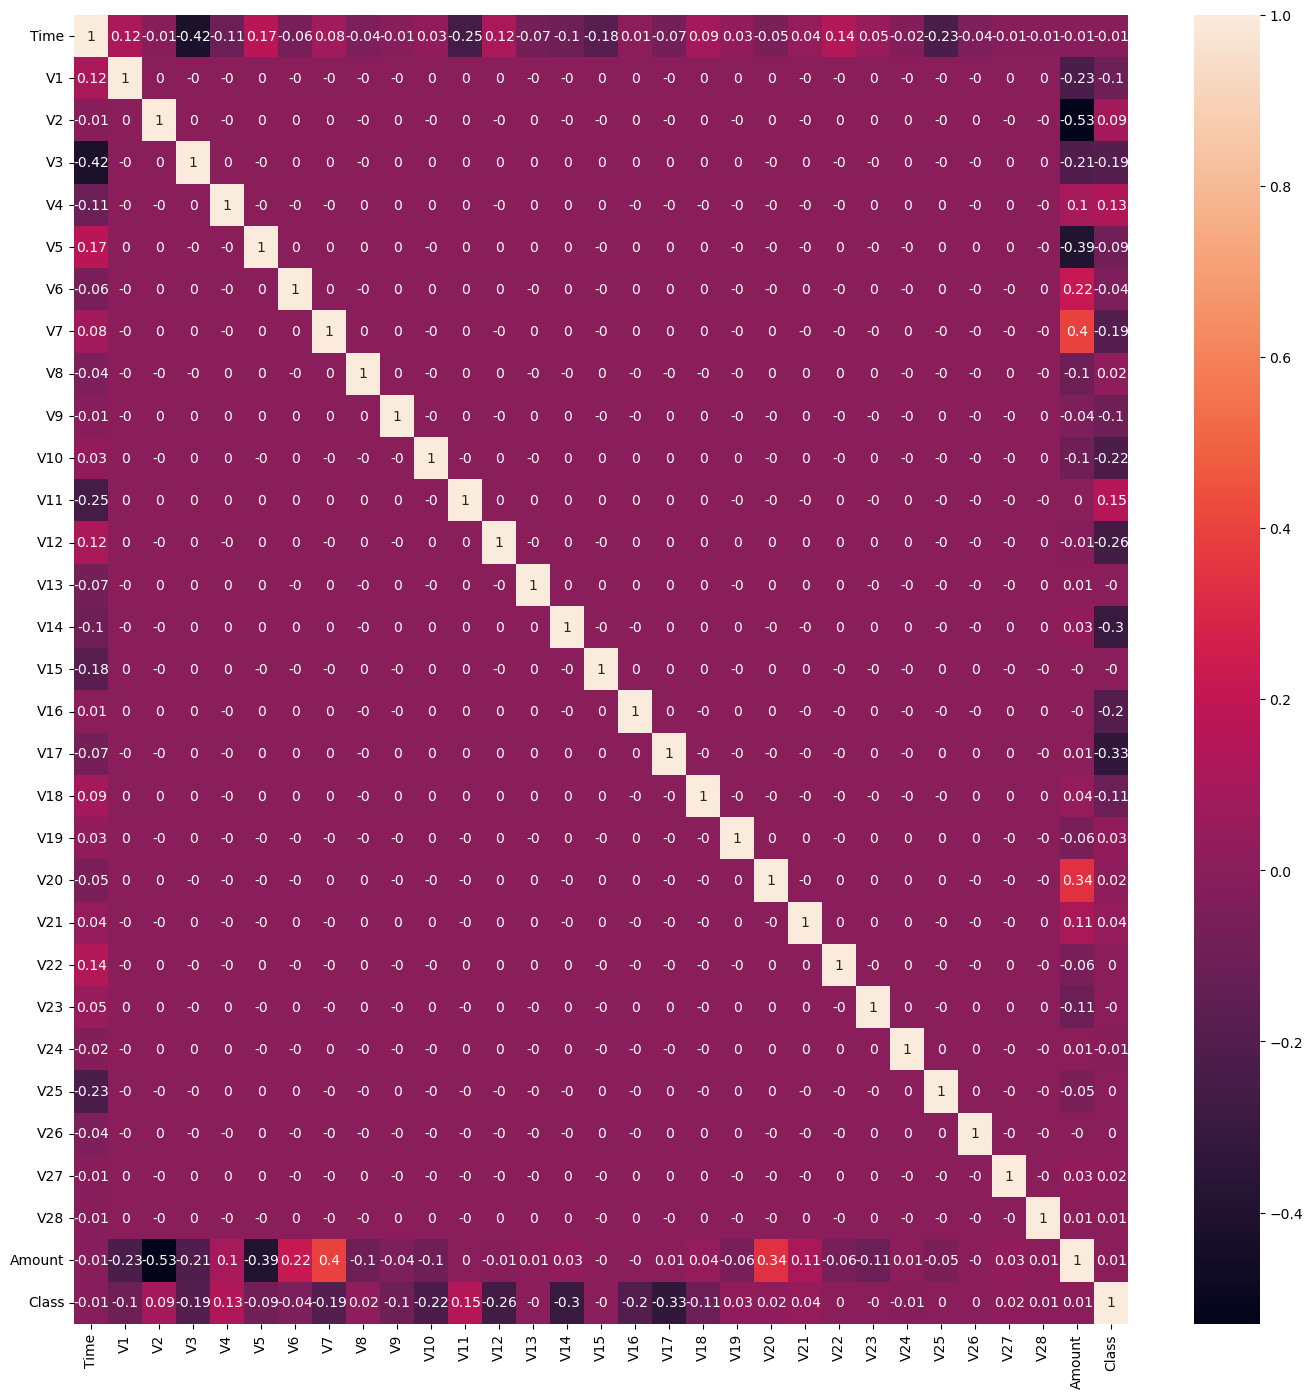

In [195]:
corr_matrix = df1.corr().round(2)
plt.figure(figsize=(17,17))
sns.heatmap(corr_matrix, annot=True)
plt.show()

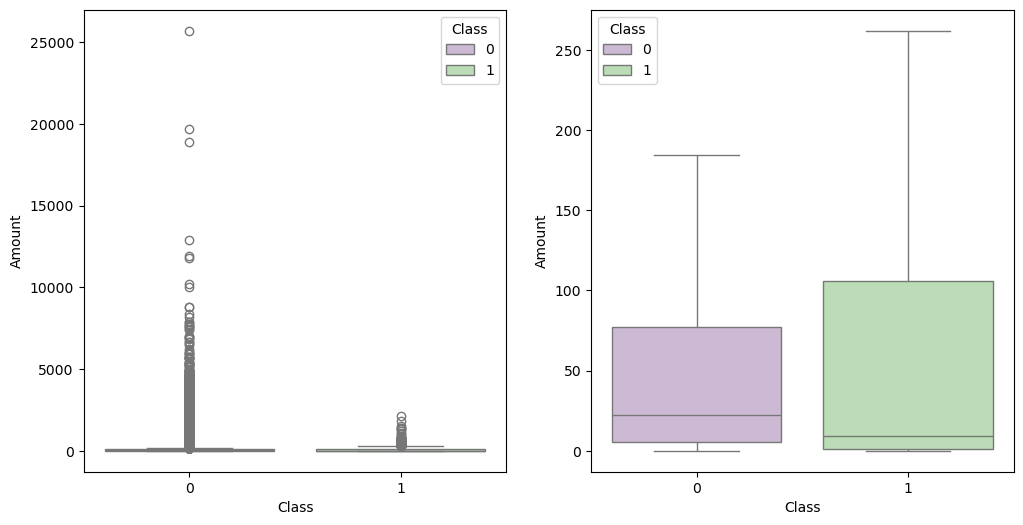

In [206]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=False)
plt.show();

In [197]:
df1[['Class']].value_counts()

Class
0        284315
1           492
Name: count, dtype: int64

In [ ]:
class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

# Creating a Seaborn KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(class_0, label='Not Fraud', shade=True)
sns.kdeplot(class_1, label='Fraud', shade=True)

# Adding titles and labels
plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Time [s]')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()

In [112]:
x = df1.drop(columns=['Class'])
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
y = df1[['Class']]
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_scaled, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=40, shuffle=True)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=40, shuffle=True)

## Model 

In [97]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier()

In [167]:
def performance(y_pred, y_valid):
    print('roc_auc_score:', roc_auc_score(y_pred, y_valid))
    print('classification_report:\n', classification_report(y_pred, y_valid))
    print('confusion_matrix:\n')
    cm = confusion_matrix(y_pred, y_valid)
    display = ConfusionMatrixDisplay(cm)
    display.plot()
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



roc_auc_score: 0.9018764327492879
classification_report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89     56522
           1       0.76      1.00      0.86     34459

    accuracy                           0.88     90981
   macro avg       0.88      0.90      0.88     90981
weighted avg       0.91      0.88      0.88     90981

confusion_matrix:



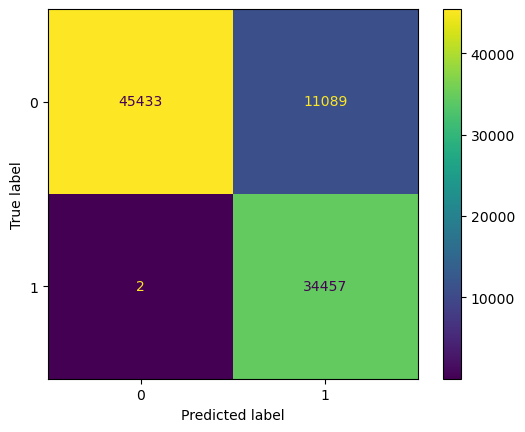

In [134]:
y_pred = RF.predict(x_valid)
performance(y_pred, y_valid)

In [ ]:

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(x_train, y_train)

# Best parameters and model evaluation
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(x_test)
performance(y_pred, y_test)


In [199]:
# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# XGBoost parameters
params = {
    'objective': 'binary:logistic',  
    'eval_metric': 'auc',           
    'max_depth': 6,                 
    'learning_rate': 0.1,           
    'n_estimators': 100,
    'random_state': 42
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)


C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning:

[19:26:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.




roc_auc_score: 0.9977473590911472
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56996
           1       1.00      1.00      1.00     56730

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

confusion_matrix:



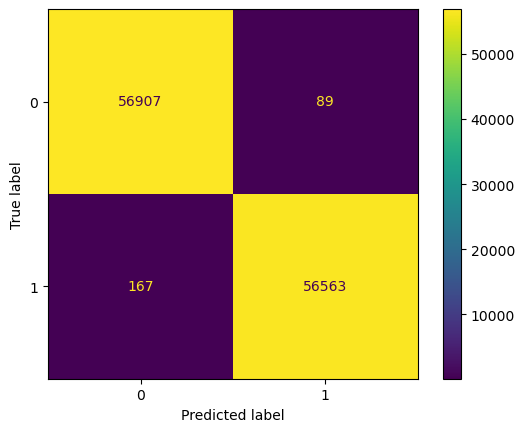

In [201]:
performance(y_pred, y_test)

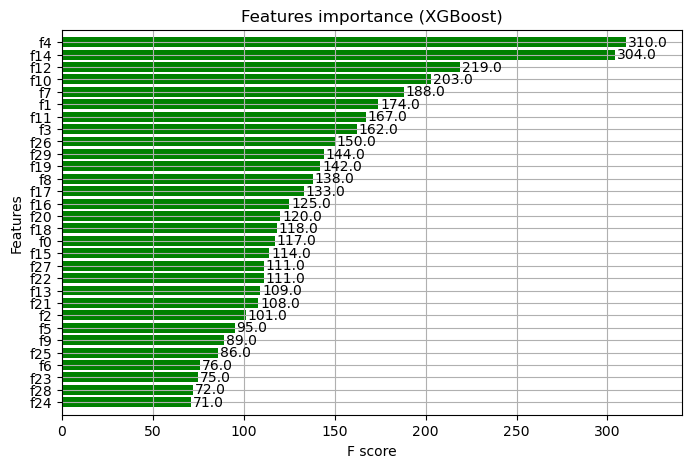

In [204]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [149]:

# Define the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=20, batch_size=32, verbose=1)

# Evaluate the model
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)


C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.9601 - loss: 0.1010 - val_accuracy: 0.9971 - val_loss: 0.0109
Epoch 2/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.9951 - loss: 0.0176 - val_accuracy: 0.9986 - val_loss: 0.0057
Epoch 3/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - accuracy: 0.9970 - loss: 0.0113 - val_accuracy: 0.9989 - val_loss: 0.0043
Epoch 4/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9976 - loss: 0.0093 - val_accuracy: 0.9990 - val_loss: 0.0043
Epoch 5/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9980 - loss: 0.0080 - val_accuracy: 0.9989 - val_loss: 0.0044
Epoch 6/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - accuracy: 0.9980 - loss: 0.0078 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 7/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.9983 - loss: 0.0072 - val_accuracy: 0.9992 - val_loss: 0.0037
Epoch 8/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57074
           1       1.00      1.00      1.00     56652

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[57031    43]
 [    0 56652]]
ROC-AUC Score: 0.9999267150039077


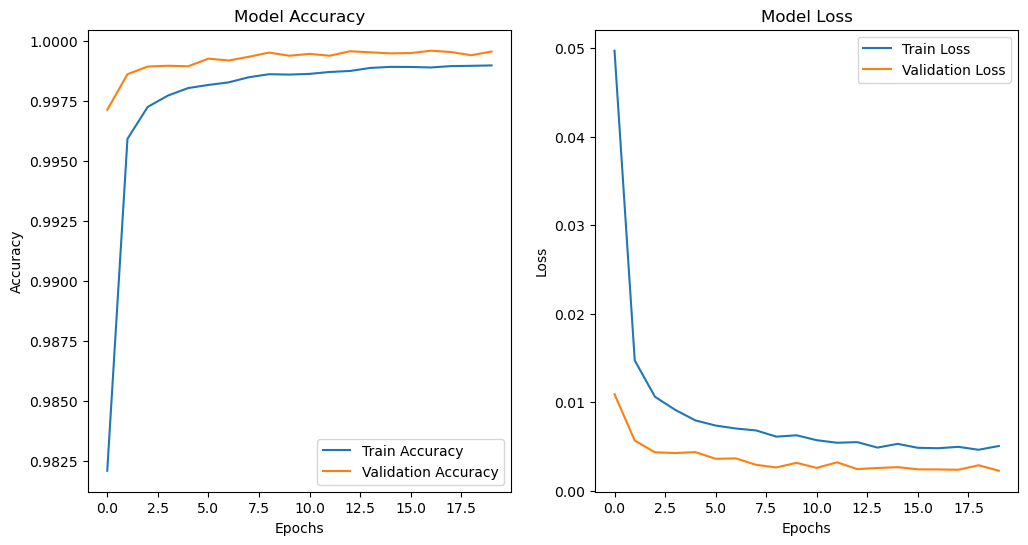

In [150]:
# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Visualize training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
